In [345]:
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

In [461]:
def prep(data):
    x = data.copy()
    
    y = x.pop('Transported')
    #features.drop('', inplace=True, axis=1)

    def encode(x, y):
        features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']
        #features = ['HomePlanet', 'CryoSleep', 'VIP']
        f_encoder = preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1).fit(x[features])
        l_encoder = preprocessing.LabelEncoder().fit(y)
        
        x[features] = f_encoder.transform(x[features])
        y = l_encoder.transform(y)
        
        return x, y

    def clust(x):
        features = ['VRDeck', 'Spa', 'ShoppingMall']
        kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 26)
        y = kmeans.fit_predict(x[features])

        return y

    def add_fam(x):
        s = np.empty(1, dtype = int)
        print(s)
        name0 = x['Name'][0].split(' ')[1]
        cabin0 = x['Cabin'][0]
        k = 1
        
        for i in range(1, len(x)):
            s = np.concatenate((s, np.array([0])))
            
            name = x['Name'][i]
            cabin = x['Cabin'][i]
            if (not isinstance(name, str)) or (not isinstance(cabin, str)):
                continue
            #print(type(name))
            name = name.split(' ')[1]
            
            if name == name0:
                if cabin == cabin0:
                    k += 1
                    for j in range(i - k + 1, i + 1):
                        s[j] = k
            else:
                k = 1

            name0 = name
            cabin0 = cabin

        x["FamilySize"] = pd.Series(s)
        #print(x)
        return x
    def imput(x):
        imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
        x1 = pd.DataFrame(imputer.fit_transform(x))
        x1.columns = x.columns
        x1.index = x.index

        #print(x1)
        return x1
    
    def prep_id(x):
        return x.split("_0")[1]

    x['PassengerId'] = x['PassengerId'].apply(prep_id)
    x = add_fam(x)
    x, y = encode(x, y)
    
    x.drop('Name', inplace=True, axis=1)
    x.drop('Cabin', inplace=True, axis=1)
    x = imput(x)
    #x.drop('Destination', inplace=True, axis=1)
    x['Gender'] = clust(x)
    #print(x)

    return x, y

In [462]:
path = 'data/train.csv'
data = pd.read_csv(path)

In [463]:
x, y = prep(data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 17)

[0]


/home/bublik/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [412]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=99)

In [465]:
accuracyKDT = []
i = 0

modelKDT = DecisionTreeClassifier(random_state=9)
modelKDT.fit(x_train, y_train)
predicted = modelKDT.predict(x_test)

accuracyKDT.append( accuracy_score(predicted, y_test) * 100)
print(f'Accuracy: {accuracyKDT[i]}%')

Accuracy: 73.6430542778289%


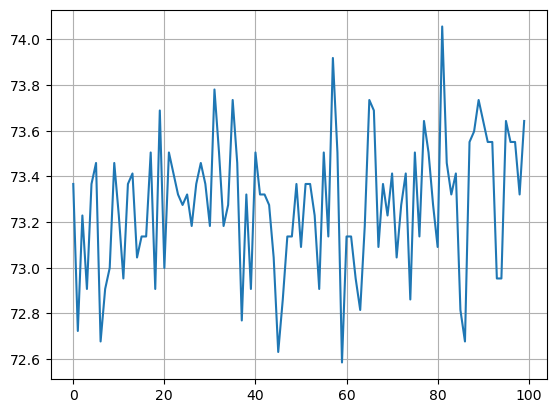

In [394]:
plt.grid()
plt.plot(accuracy)

In [414]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
accuracyRFC = []
for i in range(100):
    modelRFC = RandomForestClassifier(max_depth=9, random_state=i)
    modelRFC.fit(x_train, y_train)
    predicted = modelRFC.predict(x_test)
    
    accuracyRFC.append( accuracy_score(predicted, y_test) * 100)
    print(f'{i}Accuracy: {accuracyRFC[i]}%')

In [422]:
accuracyRFC[8]

80.08279668813248

In [464]:
accuracyRFC = []
modelRFC = RandomForestClassifier(max_depth=9, random_state=98)
modelRFC.fit(x_train, y_train)
predicted = modelRFC.predict(x_test)
    
accuracyRFC.append( accuracy_score(predicted, y_test) * 100)
print(f'{i}Accuracy: {accuracyRFC[0]}%')

99Accuracy: 80.58877644894204%
